<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Package:


In [1]:
!pip install git+https://github.com/tobnie/gaze_predictor_nn.git

import gaze_predictor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tobnie/gaze_predictor_nn.git to /tmp/pip-req-build-fewgy2zw
  Running command git clone -q https://github.com/tobnie/gaze_predictor_nn.git /tmp/pip-req-build-fewgy2zw
  Created wheel for gaze-predictor: filename=gaze_predictor-1.0-py3-none-any.whl size=7006622 sha256=4e9ad3a3e02584a23e6a6a5e1440c993364aedf4a79aa41e3891283d8103dc39
  Stored in directory: /tmp/pip-ephem-wheel-cache-7dqraot9/wheels/fb/60/2c/eca224cb9d23d9b8f6e38fe609cdc3286e1c6b614ecbd2d007
Successfully built gaze-predictor


Configuration for NN:

In [2]:
from tensorflow import keras

nn_configuration = {
    'epochs': 5,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [3]:
from gaze_predictor.gaze_predictor.fully_connected import FCNetwork

nn = gaze_predictor.gaze_predictor.fully_connected.FCNetwork(name='fc_nn', configuration = nn_configuration)
nn.create_model()

Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 128)               38528     
                                                                 
 Hidden2 (Dense)             (None, 16)                2064      
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 130,909
Trainable params: 130,909
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [4]:
nn.train()

Epoch 1/5
1487/1487 [==============================] - 14s 9ms/step - loss: 4.6854 - root_mean_squared_error: 2.1646 - val_loss: 4.9844 - val_root_mean_squared_error: 2.2326
Epoch 2/5
1487/1487 [==============================] - 9s 6ms/step - loss: 4.2632 - root_mean_squared_error: 2.0648 - val_loss: 4.4317 - val_root_mean_squared_error: 2.1051
Epoch 3/5
1487/1487 [==============================] - 7s 4ms/step - loss: 3.9674 - root_mean_squared_error: 1.9918 - val_loss: 4.3310 - val_root_mean_squared_error: 2.0811
Epoch 4/5
1487/1487 [==============================] - 7s 4ms/step - loss: 3.6754 - root_mean_squared_error: 1.9171 - val_loss: 4.0066 - val_root_mean_squared_error: 2.0016
Epoch 5/5
1487/1487 [==============================] - 6s 4ms/step - loss: 3.4275 - root_mean_squared_error: 1.8513 - val_loss: 3.7836 - val_root_mean_squared_error: 1.9451


Evaluate Model:

465/465 [==============================] - 1s 2ms/step - loss: 3.4819 - root_mean_squared_error: 1.8660

Test root_mean_squared_error: 1.865997314453125

Test loss: 3.4819459915161133


FileNotFoundError: ignored

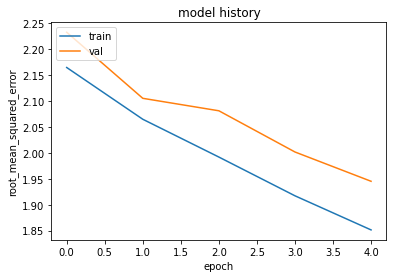

In [5]:
nn.evaluate()